# Tarefa de Regressão Linear



## Alunos

* Daniel La Rubia Rolim -- DRE: 115033904
* Victor Ribeiro Pires -- DRE: 113051532

## Código

**Dataset:** [Performance de alunos em provas](https://www.kaggle.com/spscientist/students-performance-in-exams)

**Objetivo:** Descobrir a classe que o aluno pertence baseado nos dados disponíveis ou descobrir, baseado nos dados, se o aluno se preparou ou não para o exame.


### Importando dependências 

In [ ]:
import pandas as pd
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np  

### Importando dataset


In [ ]:
plt.rc("font", size=14)

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# --- #
# Atribudos
columns = ['Gender', 'Race/Ethnicity', 'Parental Level of Education', 'Lunch', 'Test preparation', 'Math score', 'Reading score', 'Writing score']

# Importando base de dados
data = pd.read_csv("StudentsPerformance.csv", header=0, names=columns)
display(data)


# Exemplo do dataset
# dataset.head()


,Gender,Race/Ethnicity,Parental Level of Education,Lunch,Test preparation,Math score,Reading score,Writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Gráficos de dispersão

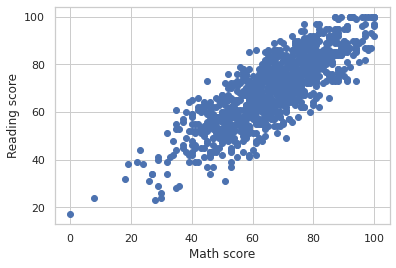

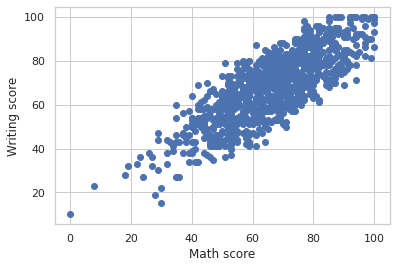

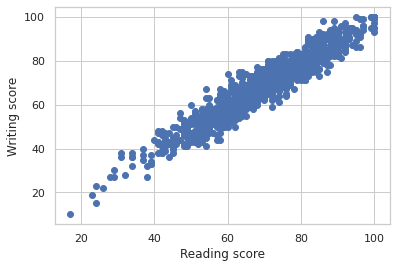

In [ ]:
# gráfico de dispersão - pode usar plt.plot(data['X'],data['Y'],'ro')

math = 'Math score'
reading = 'Reading score'
writing = 'Writing score'

# rótulo dos eixos e salvando o arquivo com a imagem

## Math x Reading
plt.scatter(data[math], data[reading], cmap='red')
plt.xlabel(math)
plt.ylabel(reading)
plt.savefig('pontos_1.png')
plt.show()

## Math x Writing
plt.scatter(data[math], data[writing], cmap='red')
plt.xlabel(math)
plt.ylabel(writing)
plt.savefig('pontos_2.png')
plt.show()

## Reading x Writing
plt.scatter(data[reading], data[writing], cmap='red')
plt.xlabel(reading)
plt.ylabel(writing)
plt.savefig('pontos_3.png')
plt.show()

# transformando X e Y para numpy array. Ele precisa ser bidimensional (-1,1)
## Math x Reading
X_1 = data[math].values.reshape(-1, 1) 
Y_1 = data[reading].values.reshape(-1, 1) 

## Math x Writing
X_2 = data[math].values.reshape(-1, 1) 
Y_2 = data[writing].values.reshape(-1, 1) 

## Reading x Writing
X_3 = data[reading].values.reshape(-1, 1) 
Y_3 = data[writing].values.reshape(-1, 1) 

#display(X)
#display(Y)

### Regressão linear

#### Cálculo da reta de regressão linear

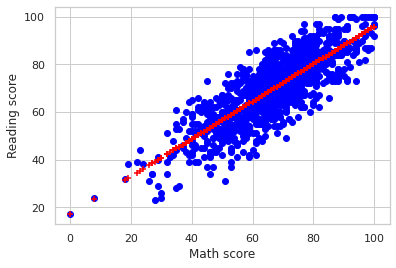

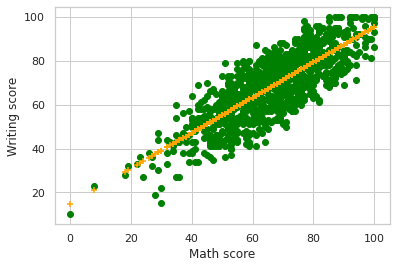

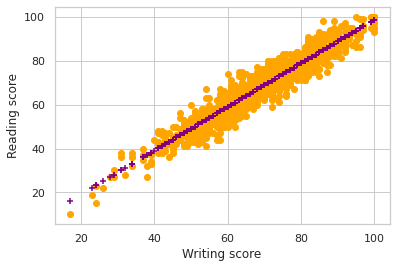

In [ ]:
linear_regression_1 = LinearRegression().fit(X_1, Y_1)
linear_regression_2 = LinearRegression().fit(X_2, Y_2)
linear_regression_3 = LinearRegression().fit(X_3, Y_3)

# Plot prediction 1
plt.scatter(X_1, Y_1, marker='o',color='blue')  #pontos originais
plt.scatter(X_1, linear_regression_1.predict(X_1), marker='+',color='red') #pontos previstos
plt.xlabel(math)
plt.ylabel(reading)
plt.savefig('pontos_originais_previstos_1.png')
plt.show()


# Plot prediction 2
plt.scatter(X_2, Y_2, marker='o',color='green')  #pontos originais
plt.scatter(X_2, linear_regression_2.predict(X_2), marker='+',color='orange') #pontos previstos
plt.xlabel(math)
plt.ylabel(writing)
plt.savefig('pontos_originais_previstos_2.png')
plt.show()

# Plot prediction 3
plt.scatter(X_3, Y_3, marker='o',color='orange')  #pontos originais
plt.scatter(X_3, linear_regression_3.predict(X_3), marker='+',color='purple') #pontos previstos
plt.ylabel(reading)
plt.xlabel(writing)
plt.savefig('pontos_originais_previstos_3.png')
plt.show()


##### Erro quadrático médio

In [ ]:
print("Erro - Figura 1: " + str(mean_squared_error(X_1, linear_regression_1.predict(X_1))))
print("Erro - Figura 2: " + str(mean_squared_error(X_2, linear_regression_2.predict(X_2))))
print("Erro - Figura 3: " + str(mean_squared_error(X_3, linear_regression_3.predict(X_3))))


Erro - Figura 1: 19.884745365190007
Erro - Figura 2: 12.651995108679115
Erro - Figura 3: 1.2521363106106307


#### Retas previstas

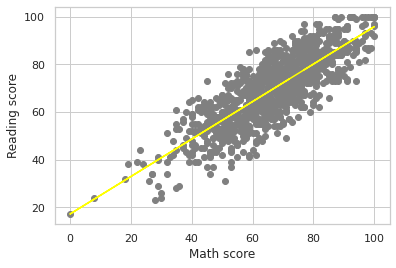

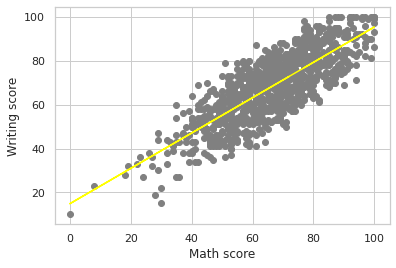

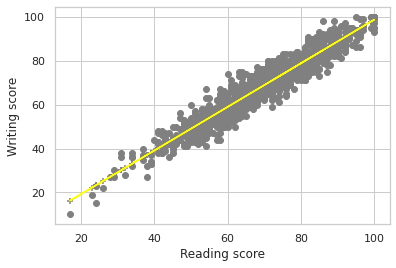

In [ ]:
# Figura 1
plt.xlabel(math)
plt.ylabel(reading)
plt.scatter(X_1, Y_1,marker='o',color='grey')  #pontos originais
# plt.scatter(X_1, linear_regression_1.predict(X_1), marker='.',color='black') #pontos previstos
plt.plot(X_1, linear_regression_1.predict(X_1), color='yellow')
plt.savefig('reta_prevista.png')
plt.show()

# Figura 2
plt.xlabel(math)
plt.ylabel(writing)
plt.scatter(X_2, Y_2,marker='o',color='grey')  #pontos originais
# plt.scatter(X_2, linear_regression_2.predict(X_2), marker='.',color='grey') #pontos previstos
plt.plot(X_2, linear_regression_2.predict(X_2), color='yellow')
plt.savefig('reta_prevista.png')
plt.show()

# Figura 3
plt.xlabel(reading)
plt.ylabel(writing)
plt.scatter(X_3, Y_3,marker='o',color='grey')  #pontos originais
plt.scatter(X_3, linear_regression_3.predict(X_3), marker='+',color='grey') #pontos previstos
plt.plot(X_3, linear_regression_3.predict(X_3), color='yellow')
plt.savefig('reta_prevista.png')
plt.show()

###Conclusões 

Durante esse trabalho, encontramos uma boa relação entre as notas de reading e writing de forma que acreditamos que se deva pelo fato de serem skills complementares. Com isso, acreditamos que não se tem como fazer um bom teste de escrita sem uma boa de leitura. Por isso ambas tiveram uma comparação também parecida com math. 